In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [32]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [33]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [34]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [35]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [36]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [37]:
# Duplicated
df.duplicated().sum()

14342

In [38]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

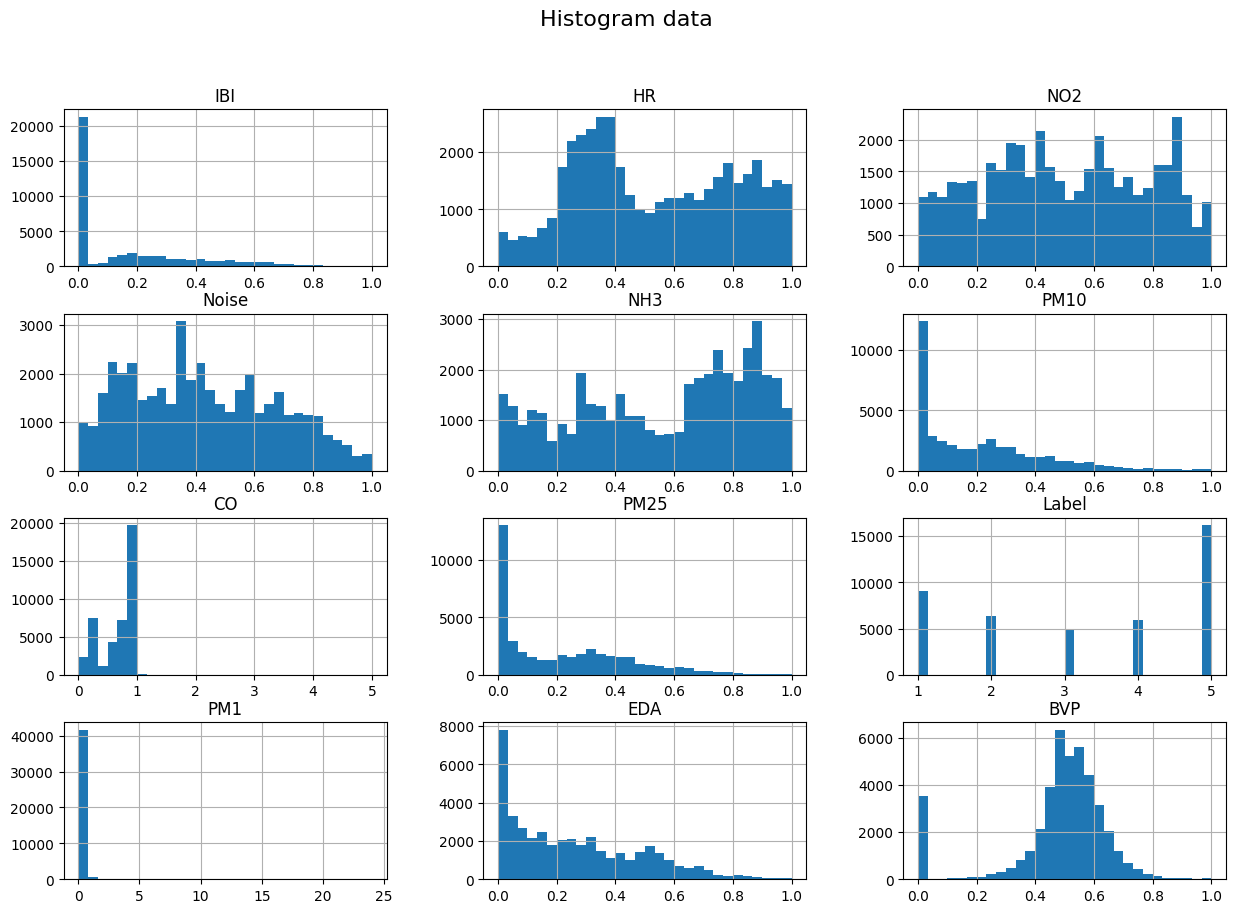

In [39]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [40]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_1920/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


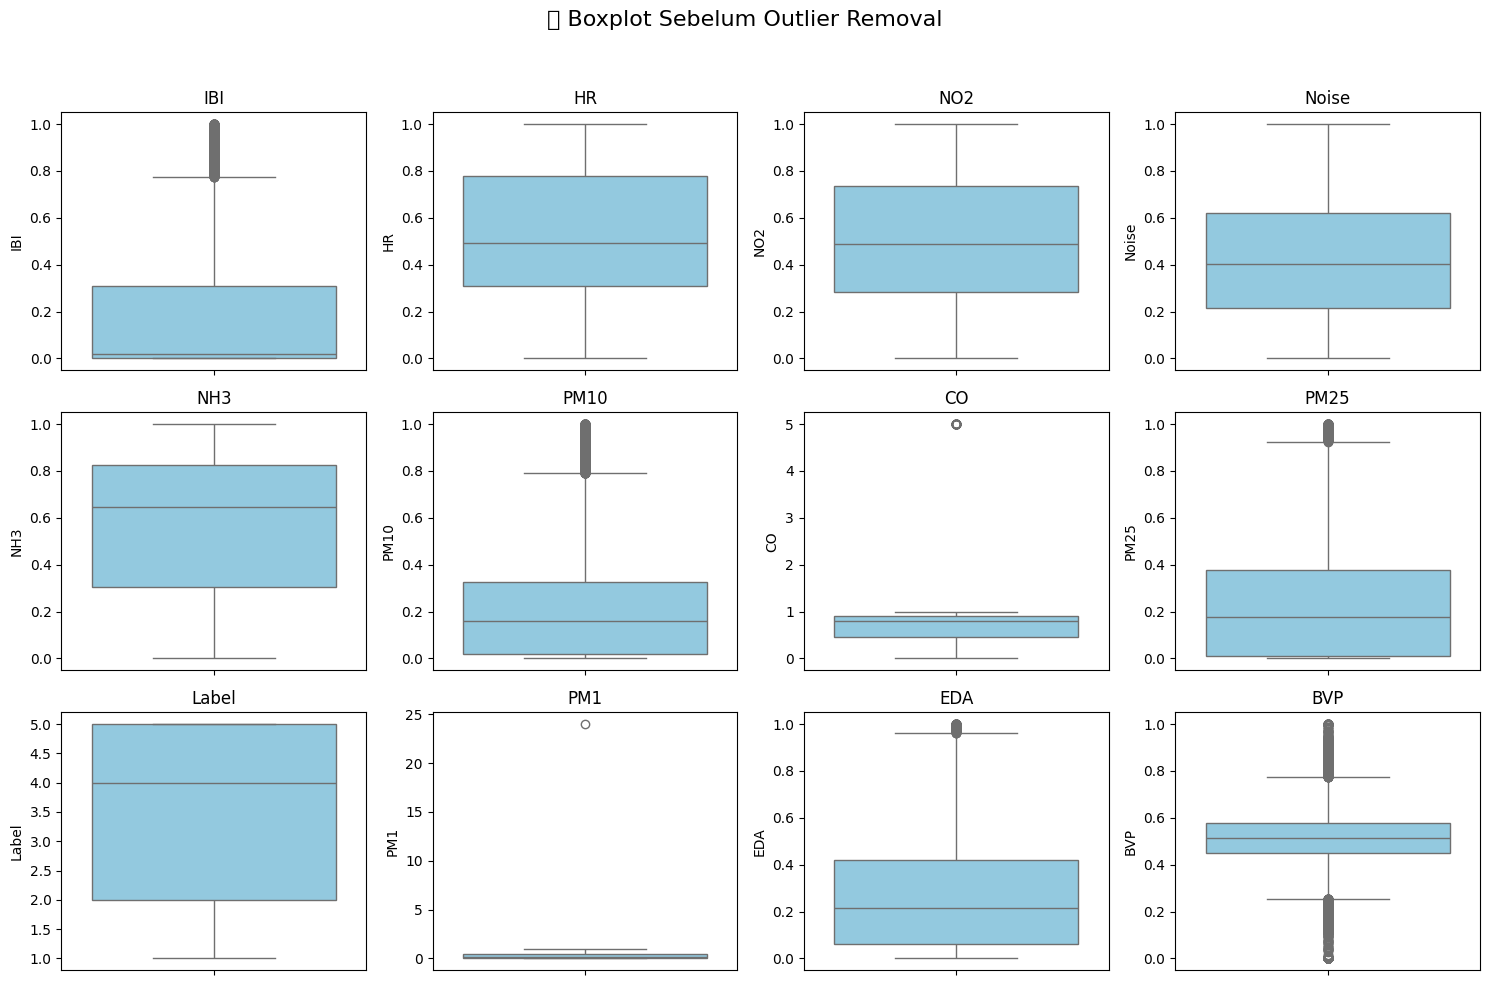

In [41]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [42]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [43]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_1920/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


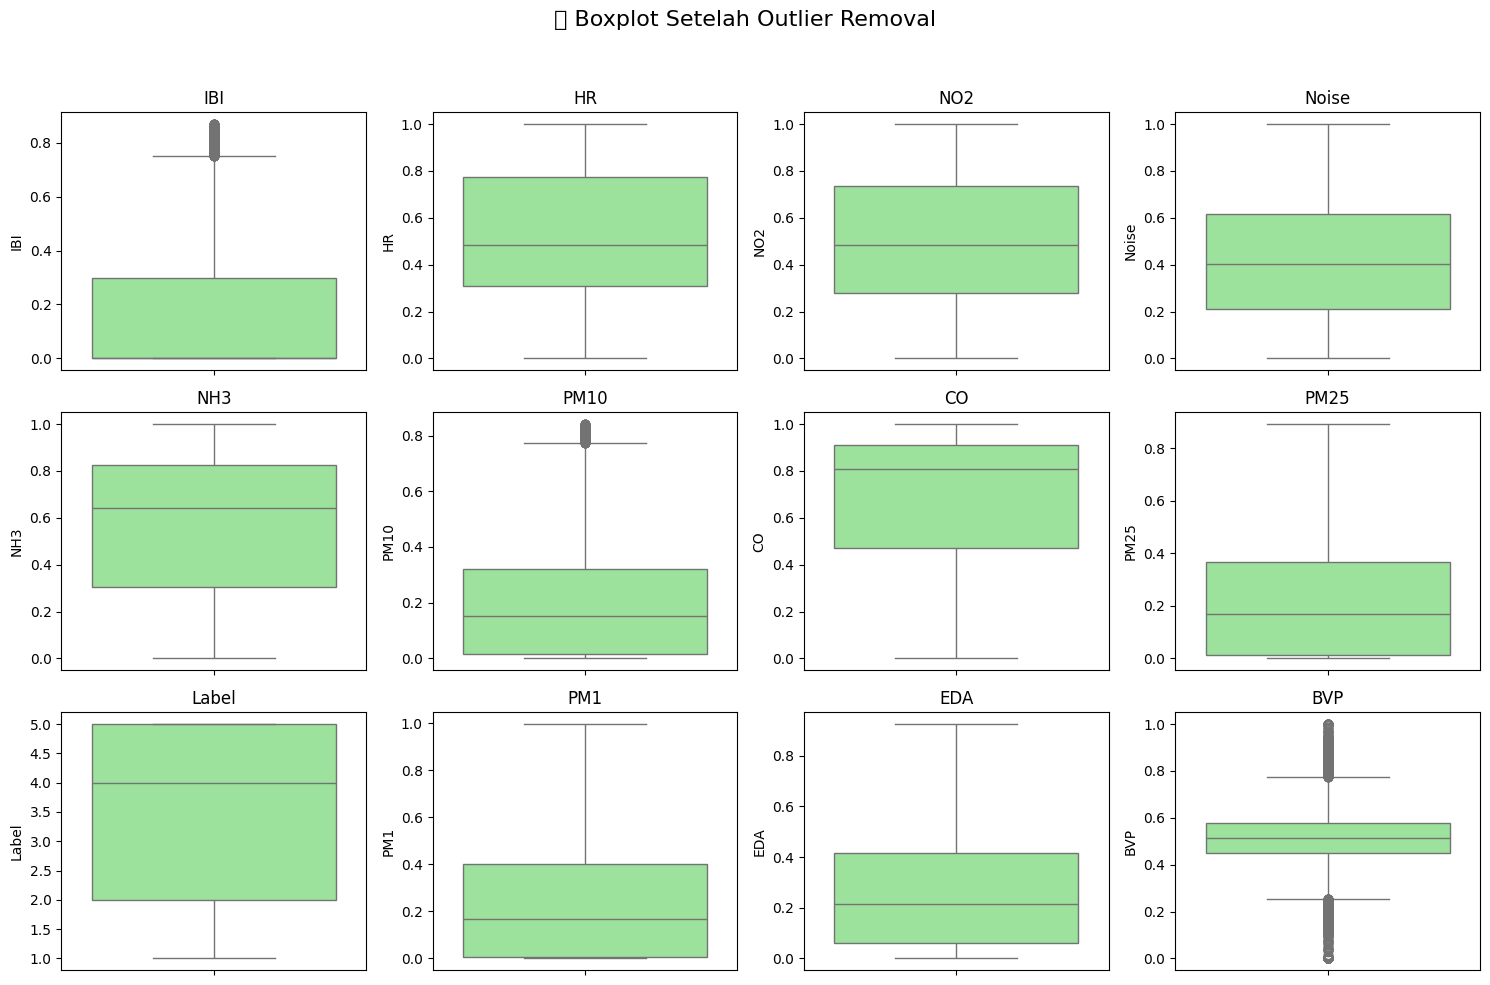

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


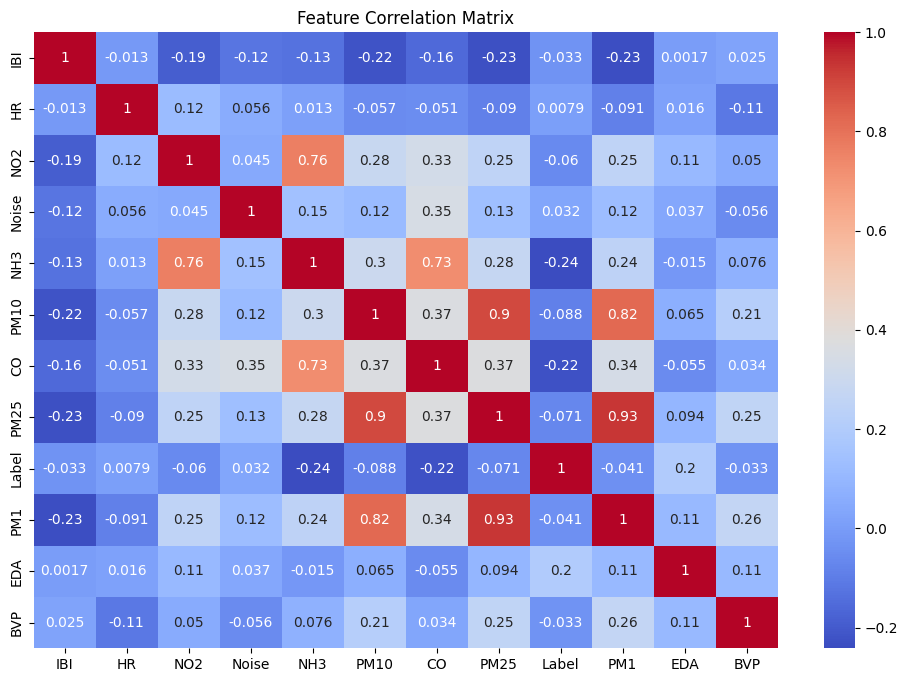

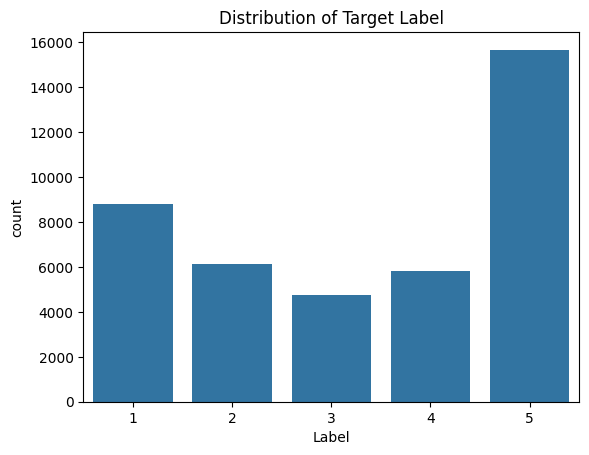

In [45]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [46]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [47]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 2. Split train-test (tanpa SMOTE dulu)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribusi sebelum Random Oversampling :")
print("Train:", Counter(y_train))
print("Test :", Counter(y_test))

# 3. Terapkan SMOTE hanya ke training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("\nDistribusi setelah Random Over (hanya train):")
print("Train Random Over:", Counter(y_train_ros))
print("Test tetap :", Counter(y_test))  # test tidak berubah


Distribusi sebelum SMOTE:
Train: Counter({5: 12537, 1: 7044, 2: 4909, 4: 4668, 3: 3793})
Test : Counter({5: 3134, 1: 1761, 2: 1228, 4: 1167, 3: 948})

Distribusi setelah Random Over (hanya train):
Train Random Over: Counter({2: 12537, 3: 12537, 1: 12537, 5: 12537, 4: 12537})
Test tetap : Counter({5: 3134, 1: 1761, 2: 1228, 4: 1167, 3: 948})


## Prepocessing

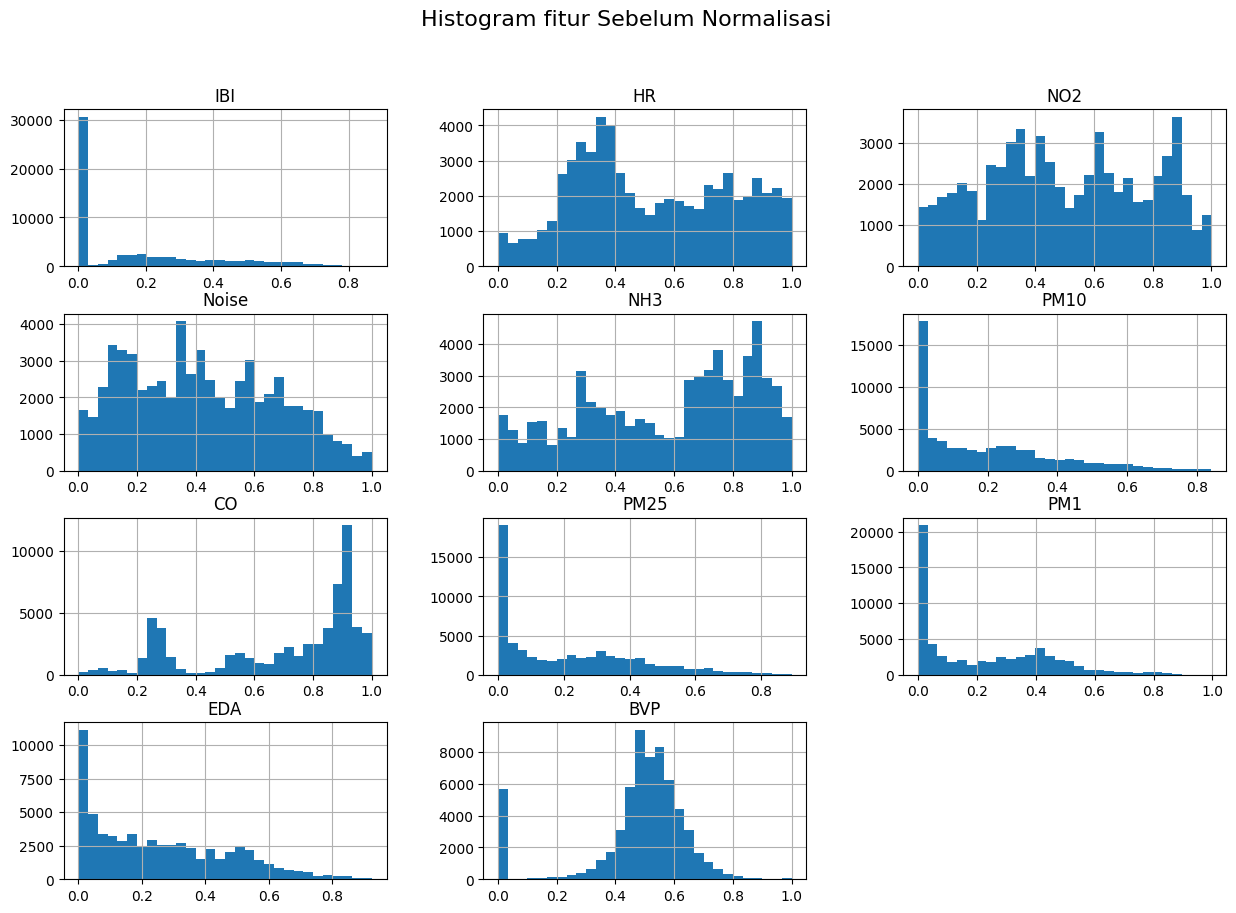

In [49]:
# Histogram sebelum normalisasi
X_train_ros.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [50]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (62685, 11)
Data Test after normalisation = (8238, 11)


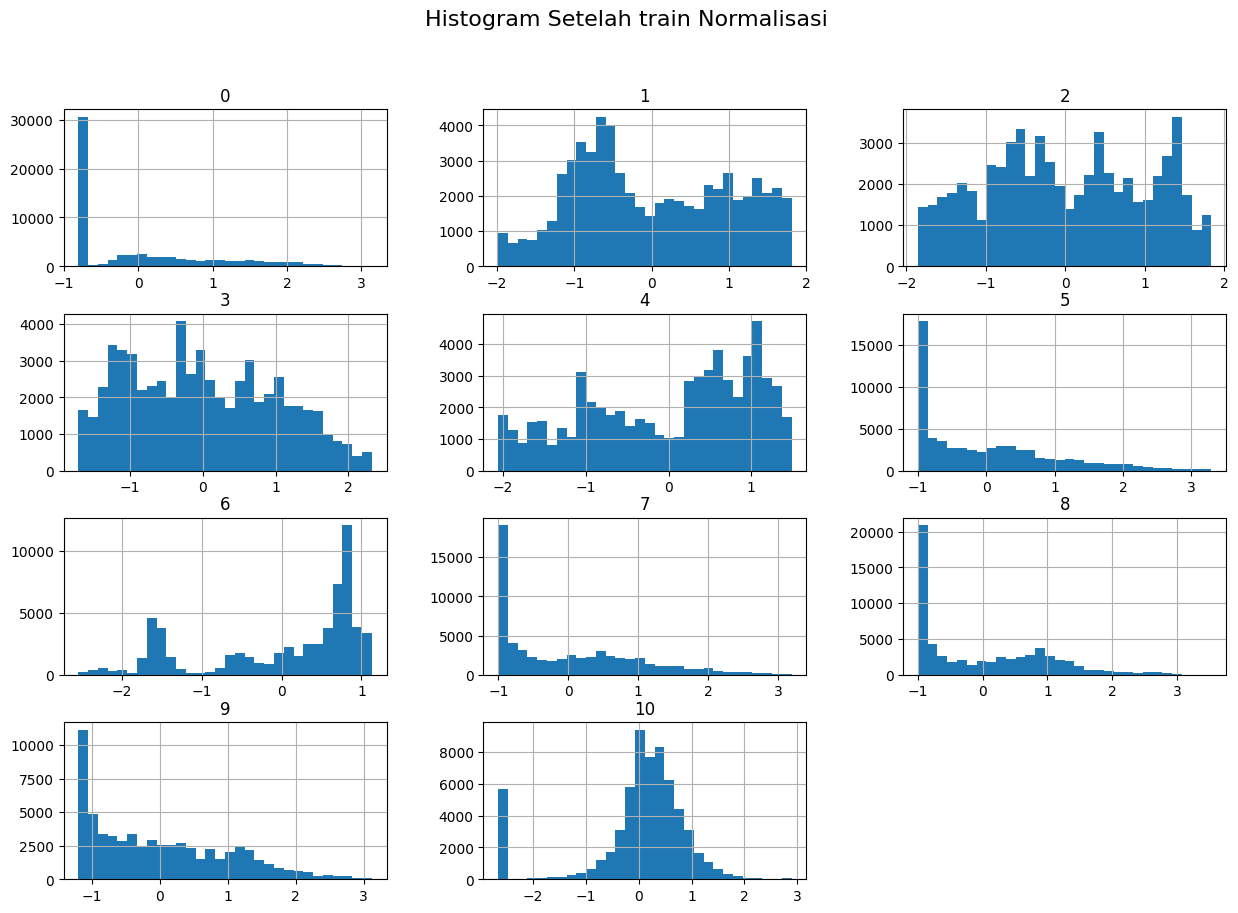

In [51]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

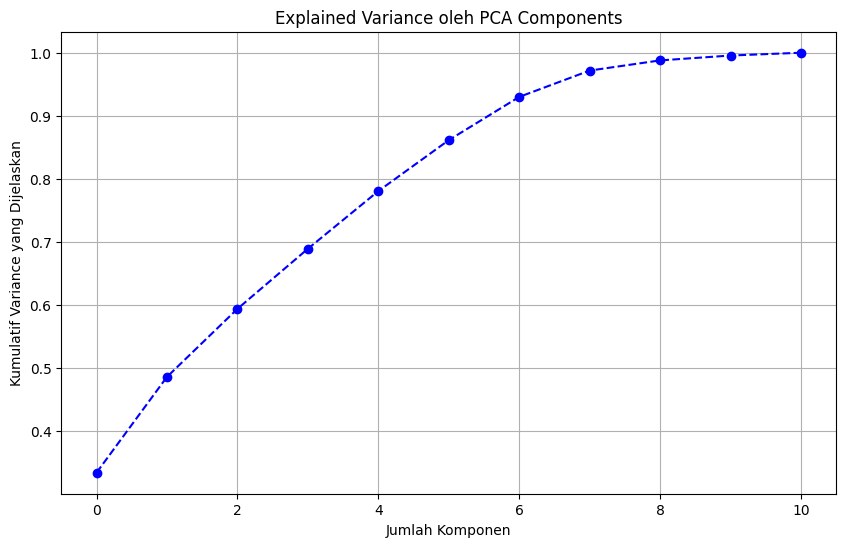

In [52]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [53]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3337 variance terjelaskan
Komponen ke-2: 0.4857 variance terjelaskan
Komponen ke-3: 0.5936 variance terjelaskan
Komponen ke-4: 0.6889 variance terjelaskan
Komponen ke-5: 0.7805 variance terjelaskan
Komponen ke-6: 0.8613 variance terjelaskan
Komponen ke-7: 0.9299 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9878 variance terjelaskan
Komponen ke-10: 0.9955 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [54]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 7)
Shape test PCA: (8238, 7)


## Training Data

In [55]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_models(X_train, X_test, y_train, y_test, percobaan="Baseline", output_file="results.csv", cv=5):
    # Daftar model
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Extra Trees" : ExtraTreesClassifier(n_estimators=100, random_state=42)
    }

    rows = []
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")

        # Training pada train-test split
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluasi test split
        report = classification_report(y_test, y_pred, output_dict=True)

        # Evaluasi cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")

        # Simpan hasil ke list
        rows.append({
            "Percobaan": percobaan,
            "Model": name,
            "Accuracy_Test": report["accuracy"],
            "Precision_Test": report["macro avg"]["precision"],
            "Recall_Test": report["macro avg"]["recall"],
            "F1-Score_Test": report["macro avg"]["f1-score"],
            "CV_Mean": cv_scores.mean(),
            "CV_Std": cv_scores.std()
        })

    # Buat dataframe hasil
    df_results = pd.DataFrame(rows)
    print("\n📊 Perbandingan Model:")
    print(df_results)

    # Simpan ke CSV (append kalau sudah ada)
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)

    # Visualisasi perbandingan hasil test split
    df_plot = df_results[df_results["Percobaan"] == percobaan].set_index("Model")[["Accuracy_Test", "Precision_Test", "Recall_Test", "F1-Score_Test", "CV_Mean"]]
    df_plot.plot(kind="bar", figsize=(12,6))
    plt.title(f"Perbandingan Model - {percobaan}")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.show()
    
    return df_results



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                                     Percobaan          Model  Accuracy_Test  \
0  Kfold CV model baseline random oversampling  Random Forest       0.986162   
1  Kfold CV model baseline random oversampling            KNN       0.959699   
2  Kfold CV model baseline random oversampling    Naive Bayes       0.382617   
3  Kfold CV model baseline random oversampling  Decision Tree       0.971231   
4  Kfold CV model baseline random oversampling    Extra Trees       0.985312   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.984530     0.983637       0.984075  0.995565  0.000399  
1        0.949044     0.957642       0.953208  0.970631  0.001709  
2        0.392765     0.407923       0.359157  0.398389  0.004645  
3        0.968880     0.966278       0.967565  0.989200  0.000753  
4        0.983400     0.9

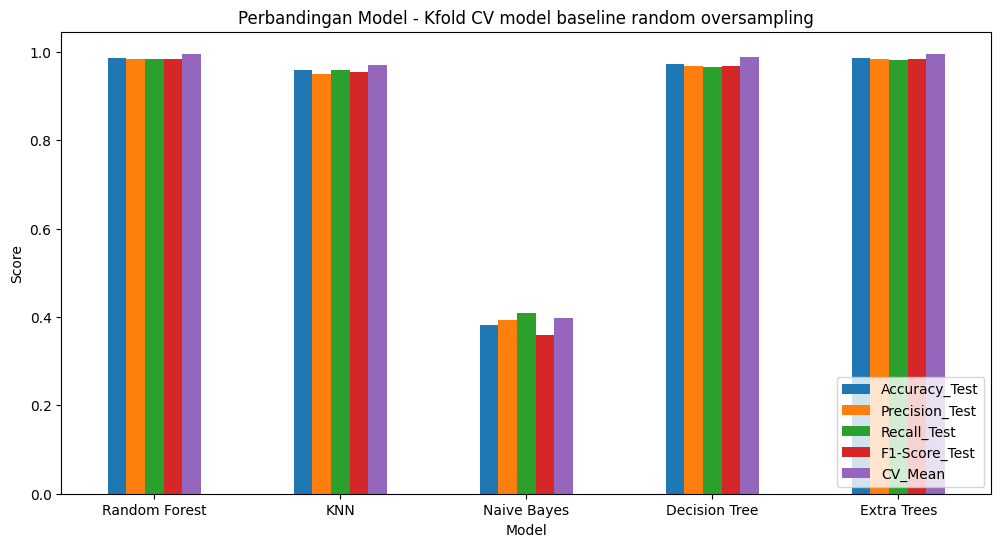

In [56]:
results = evaluate_models(
    X_train_ros, X_test, y_train_ros, y_test,
    percobaan="Kfold CV model baseline random oversampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)


🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                                        Percobaan          Model  \
0  Kfold CV model normalisasi random oversampling  Random Forest   
1  Kfold CV model normalisasi random oversampling            KNN   
2  Kfold CV model normalisasi random oversampling    Naive Bayes   
3  Kfold CV model normalisasi random oversampling  Decision Tree   
4  Kfold CV model normalisasi random oversampling    Extra Trees   

   Accuracy_Test  Precision_Test  Recall_Test  F1-Score_Test   CV_Mean  \
0       0.985191        0.983453     0.982452       0.982943  0.995438   
1       0.950231        0.937793     0.948361       0.942849  0.965398   
2       0.382617        0.392765     0.407923       0.359157  0.398389   
3       0.970017        0.967439     0.964570       0.965984  0.989136   
4       0.985433        0.983573     0.981907       0.982726  0.995

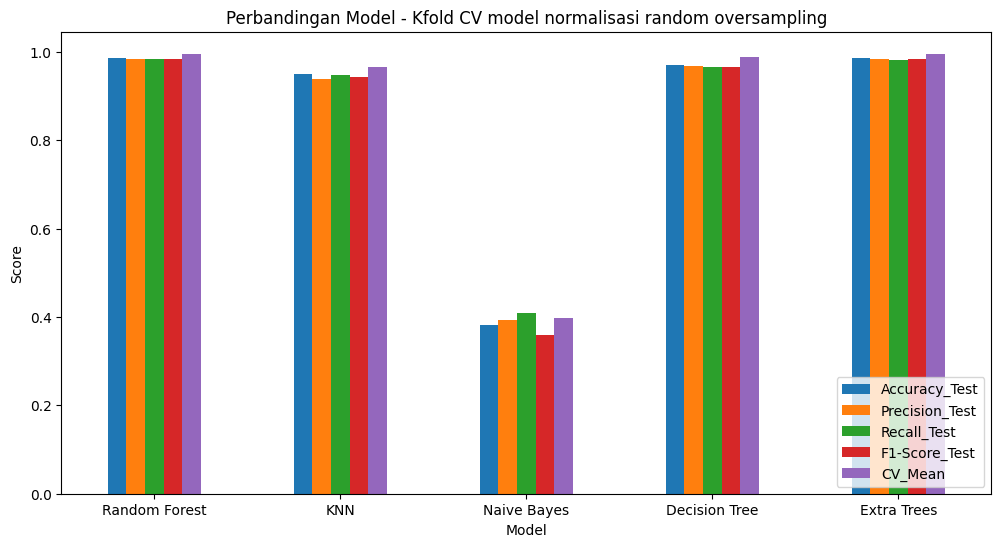

In [57]:
results = evaluate_models(
    X_train_scaled, X_test_scaled, y_train_ros, y_test,
    percobaan="Kfold CV model normalisasi random oversampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)

In [58]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 7)
Shape test PCA: (8238, 7)



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                                  Percobaan          Model  Accuracy_Test  \
0  Kfold CV model pca 7 random oversampling  Random Forest       0.956543   
1  Kfold CV model pca 7 random oversampling            KNN       0.932265   
2  Kfold CV model pca 7 random oversampling    Naive Bayes       0.420248   
3  Kfold CV model pca 7 random oversampling  Decision Tree       0.916606   
4  Kfold CV model pca 7 random oversampling    Extra Trees       0.960427   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.953029     0.948256       0.950601  0.985276  0.001211  
1        0.916876     0.932317       0.924065  0.955747  0.001984  
2        0.420693     0.460071       0.412906  0.455946  0.003812  
3        0.909702     0.907872       0.908729  0.969690  0.001487  
4        0.958421     0.950864       0.9545

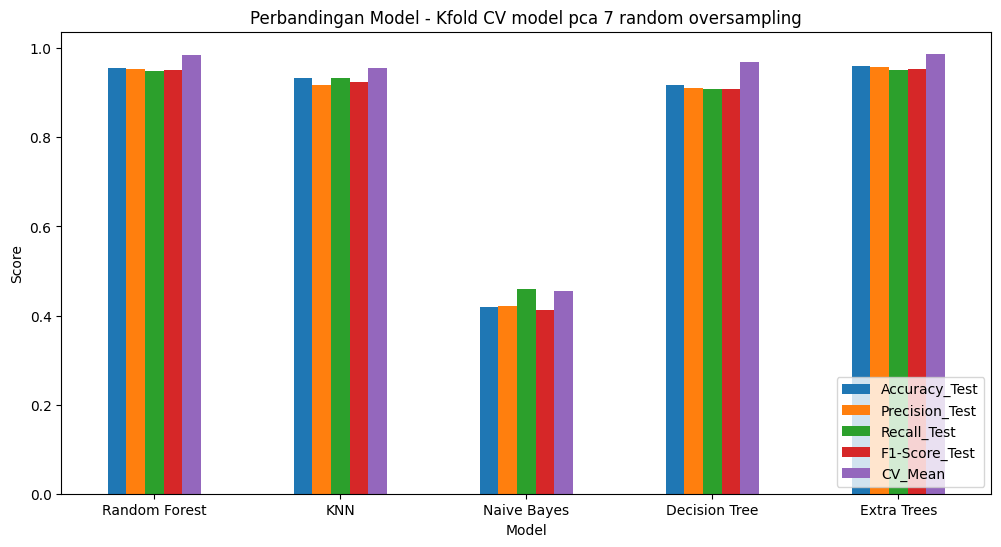

In [59]:
results = evaluate_models(
    X_train_pca, X_test_pca, y_train_ros, y_test,
    percobaan="Kfold CV model pca 7 random oversampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)

In [60]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 6 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 6)
Shape test PCA: (8238, 6)



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                                  Percobaan          Model  Accuracy_Test  \
0  Kfold CV model pca 6 random oversampling  Random Forest       0.956057   
1  Kfold CV model pca 6 random oversampling            KNN       0.939427   
2  Kfold CV model pca 6 random oversampling    Naive Bayes       0.420612   
3  Kfold CV model pca 6 random oversampling  Decision Tree       0.921097   
4  Kfold CV model pca 6 random oversampling    Extra Trees       0.958485   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.952471     0.947661       0.950016  0.985419  0.001059  
1        0.925537     0.940358       0.932511  0.958379  0.002076  
2        0.426370     0.465195       0.413442  0.454862  0.003907  
3        0.913432     0.911070       0.912148  0.970376  0.000631  
4        0.956255     0.948968       0.9525

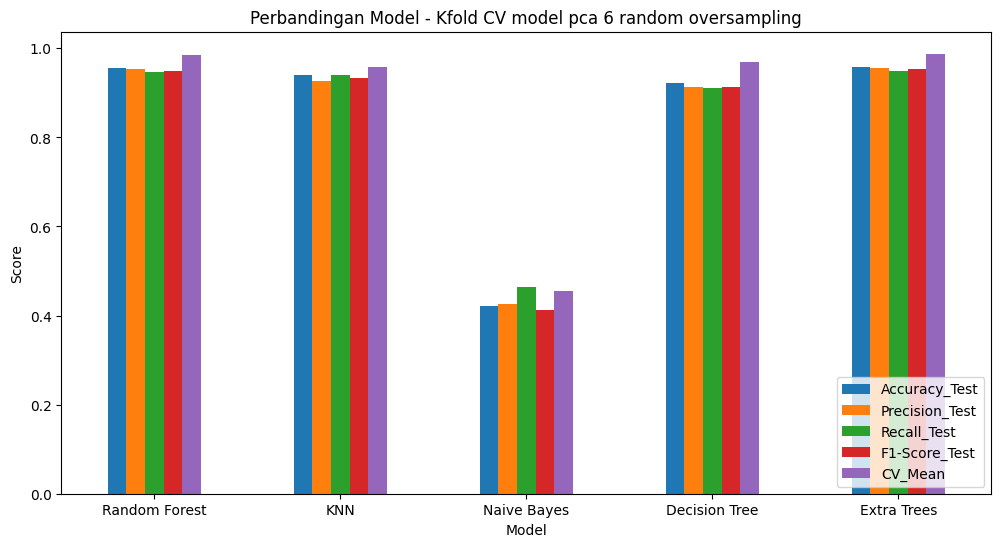

In [61]:
results = evaluate_models(
    X_train_pca, X_test_pca, y_train_ros, y_test,
    percobaan="Kfold CV model pca 6 random oversampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)

In [62]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 6 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62685, 5)
Shape test PCA: (8238, 5)



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                                  Percobaan          Model  Accuracy_Test  \
0  Kfold CV model pca 5 random oversampling  Random Forest       0.942340   
1  Kfold CV model pca 5 random oversampling            KNN       0.921462   
2  Kfold CV model pca 5 random oversampling    Naive Bayes       0.388201   
3  Kfold CV model pca 5 random oversampling  Decision Tree       0.904588   
4  Kfold CV model pca 5 random oversampling    Extra Trees       0.947317   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.936794     0.933737       0.935225  0.979612  0.001100  
1        0.905541     0.924683       0.914425  0.943910  0.002738  
2        0.394236     0.422788       0.377916  0.417165  0.004020  
3        0.893950     0.894041       0.893980  0.964617  0.001131  
4        0.946258     0.936258       0.9410

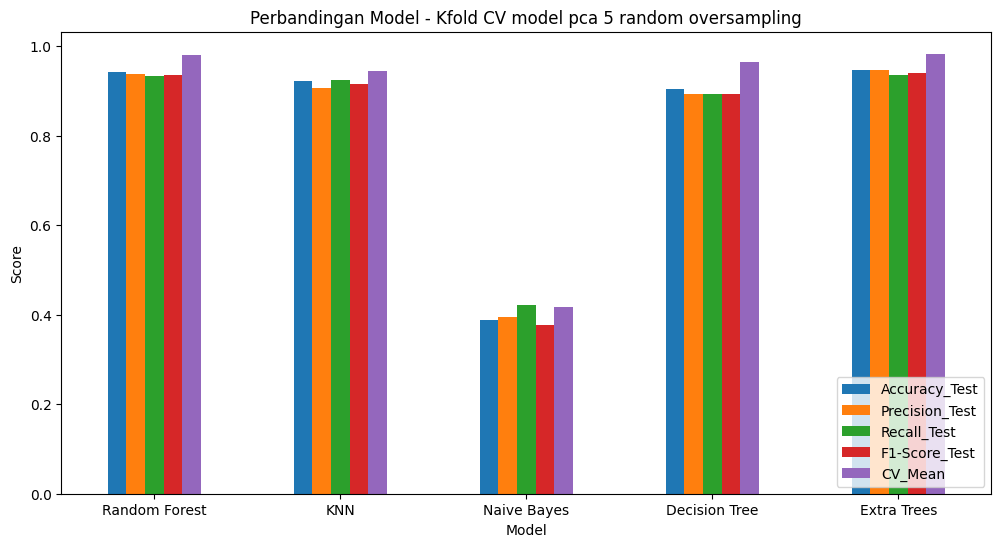

In [63]:
results = evaluate_models(
    X_train_pca, X_test_pca, y_train_ros, y_test,
    percobaan="Kfold CV model pca 5 random oversampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)